In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol4_P2_7_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control4_P2_7_18_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control4_P2_7_18_24_stimulus_time0.csv'

north_pixel = 95
south_pixel = 414
east_pixel = 486
west_pixel = 146
shelter_x_pixel = 326
shelter_y_pixel = 385

#estimate for when mouse reaches shelter
escape_done = 10 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 2)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
11430,11430,11430,19.437497,-5.885317,0.999939,18.307118,-5.080575,0.999997,18.618466,-4.323656,...,15.625008,-4.323283,0.999977,14.110466,-3.784428,0.999988,12.606764,-2.902740,0.999985,24.641037
11431,11431,11431,18.173440,-6.476626,0.998820,17.564750,-5.540433,0.999987,17.985914,-4.999229,...,15.406805,-4.323283,0.999958,14.092491,-3.711812,0.999973,12.561671,-2.607634,0.999991,24.680985
11432,11432,11432,17.176930,-6.838241,0.864686,17.001811,-6.024763,0.999783,17.649315,-5.650902,...,15.336256,-4.371307,0.999955,14.092491,-3.711812,0.999952,12.535833,-2.586480,0.999991,24.722701
11433,11433,11433,17.117918,-7.084692,0.895531,16.834045,-6.259432,0.999559,17.562434,-5.925233,...,15.281920,-4.511771,0.999963,14.079367,-3.711812,0.999946,12.438232,-2.586480,0.999992,24.761088
11434,11434,11434,16.987559,-7.354617,0.980707,16.762358,-6.461135,0.999888,17.513617,-6.091876,...,15.208252,-4.708587,0.999984,14.027456,-3.882860,0.999953,12.436212,-2.586480,0.999994,24.801101


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
10815,10815,10815,-16.321658,-17.032251,0.999990,-18.085697,-16.311315,0.999986,-17.890065,-15.455348,...,0.999989,-22.579199,-15.159559,0.999995,0.034905,46.442137,3.458000,0.137566,1.509826,1.044158
10816,10816,10816,-16.343301,-17.253425,0.999987,-18.085697,-16.515324,0.999987,-17.890065,-15.666476,...,0.999987,-22.579199,-15.160306,0.999994,0.074905,46.553906,3.173207,0.126928,1.524476,0.366246
10817,10817,10817,-16.364129,-17.815889,0.999987,-18.114026,-16.733661,0.999993,-18.007599,-16.029666,...,0.999989,-22.579199,-15.168873,0.999994,0.115507,46.667651,2.805003,0.113889,1.679147,3.809453
10818,10818,10818,-16.888646,-18.179242,0.999961,-18.588642,-17.104925,0.999999,-18.170120,-16.497965,...,0.999989,-22.613537,-15.214365,0.999991,0.155289,47.038822,9.615643,0.382530,1.683113,0.099698
10819,10819,10819,-17.070933,-18.331489,0.999983,-18.815379,-17.206253,0.999999,-18.379404,-16.617272,...,0.999987,-22.812771,-15.214365,0.999987,0.194931,47.084710,2.433059,0.096451,1.689004,0.148583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10908,10908,10908,5.407194,23.480256,0.997578,4.575903,22.427610,0.999985,3.864197,22.838305,...,0.999969,1.483657,16.242796,0.999988,3.757107,5.529596,28.167969,1.148352,1.501805,4.278465
10909,10909,10909,6.291211,24.378199,0.992558,5.398784,23.450337,0.999957,4.712554,23.722552,...,0.999986,2.074887,17.277742,0.999746,3.795865,4.706665,33.897031,1.313781,1.941404,11.342129
10910,10910,10910,6.680635,24.898821,0.998370,5.937069,23.955021,0.999971,5.213267,24.411550,...,0.999988,2.354013,18.017493,0.999966,3.835789,4.412324,18.985276,0.757968,2.001346,1.501407
10911,10911,10911,7.503396,25.199403,0.996368,6.516428,24.309216,0.999965,5.911313,24.687284,...,0.999941,2.391606,18.992875,0.999951,3.876659,4.337615,13.930551,0.569342,2.271891,6.619660


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

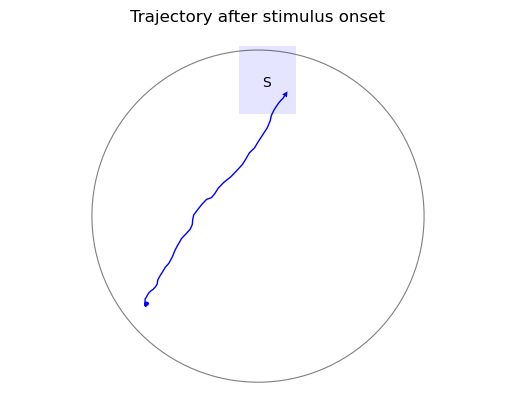

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

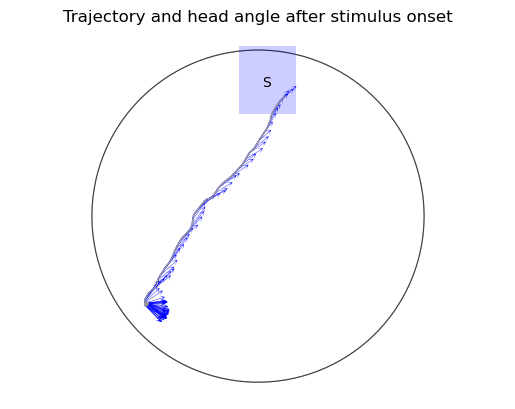

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
10815,10815,10815,-16.321658,-17.032251,0.999990,-18.085697,-16.311315,0.999986,-17.890065,-15.455348,...,0.999989,-22.579199,-15.159559,0.999995,0.034905,46.442137,3.458000,0.137566,1.509826,1.044158
10816,10816,10816,-16.343301,-17.253425,0.999987,-18.085697,-16.515324,0.999987,-17.890065,-15.666476,...,0.999987,-22.579199,-15.160306,0.999994,0.074905,46.553906,3.173207,0.126928,1.524476,0.366246
10817,10817,10817,-16.364129,-17.815889,0.999987,-18.114026,-16.733661,0.999993,-18.007599,-16.029666,...,0.999989,-22.579199,-15.168873,0.999994,0.115507,46.667651,2.805003,0.113889,1.679147,3.809453
10818,10818,10818,-16.888646,-18.179242,0.999961,-18.588642,-17.104925,0.999999,-18.170120,-16.497965,...,0.999989,-22.613537,-15.214365,0.999991,0.155289,47.038822,9.615643,0.382530,1.683113,0.099698
10819,10819,10819,-17.070933,-18.331489,0.999983,-18.815379,-17.206253,0.999999,-18.379404,-16.617272,...,0.999987,-22.812771,-15.214365,0.999987,0.194931,47.084710,2.433059,0.096451,1.689004,0.148583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10908,10908,10908,5.407194,23.480256,0.997578,4.575903,22.427610,0.999985,3.864197,22.838305,...,0.999969,1.483657,16.242796,0.999988,3.757107,5.529596,28.167969,1.148352,1.501805,4.278465
10909,10909,10909,6.291211,24.378199,0.992558,5.398784,23.450337,0.999957,4.712554,23.722552,...,0.999986,2.074887,17.277742,0.999746,3.795865,4.706665,33.897031,1.313781,1.941404,11.342129
10910,10910,10910,6.680635,24.898821,0.998370,5.937069,23.955021,0.999971,5.213267,24.411550,...,0.999988,2.354013,18.017493,0.999966,3.835789,4.412324,18.985276,0.757968,2.001346,1.501407
10911,10911,10911,7.503396,25.199403,0.996368,6.516428,24.309216,0.999965,5.911313,24.687284,...,0.999941,2.391606,18.992875,0.999951,3.876659,4.337615,13.930551,0.569342,2.271891,6.619660


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

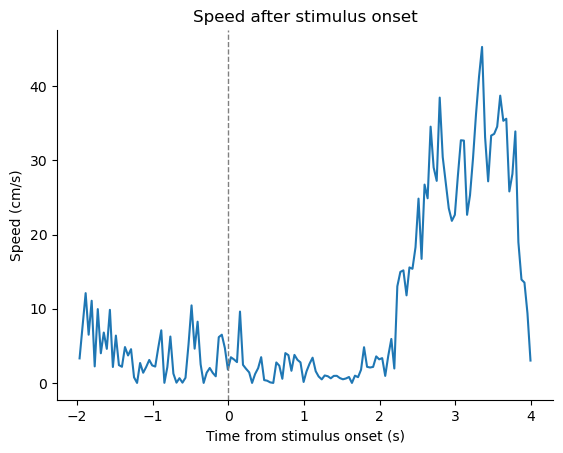

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

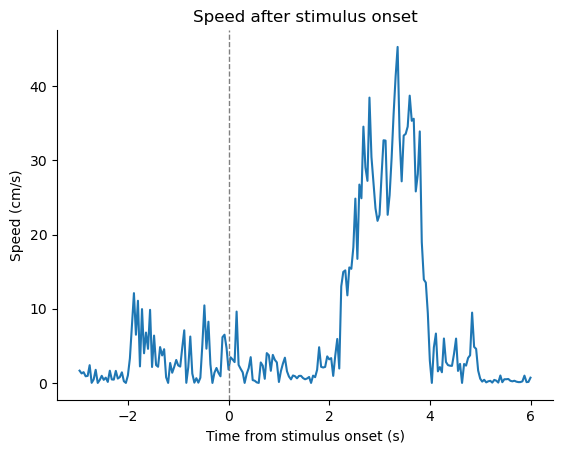

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

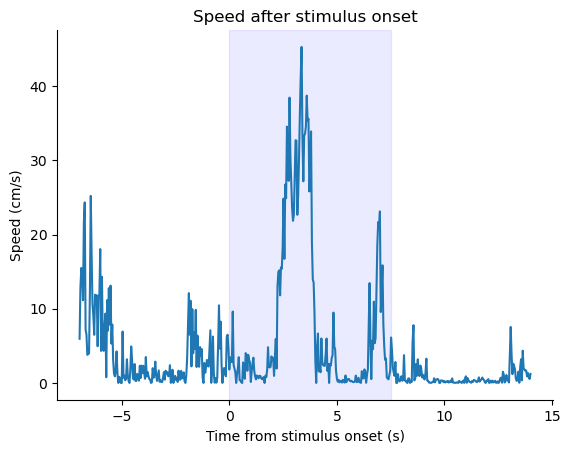

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

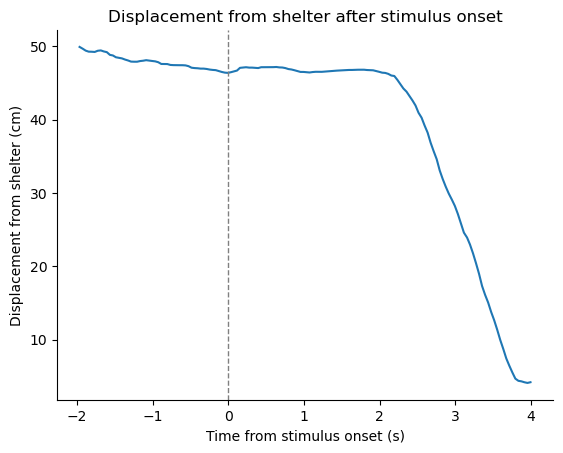

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

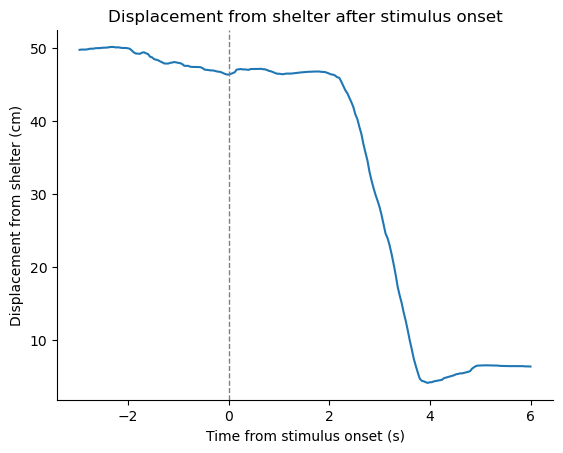

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

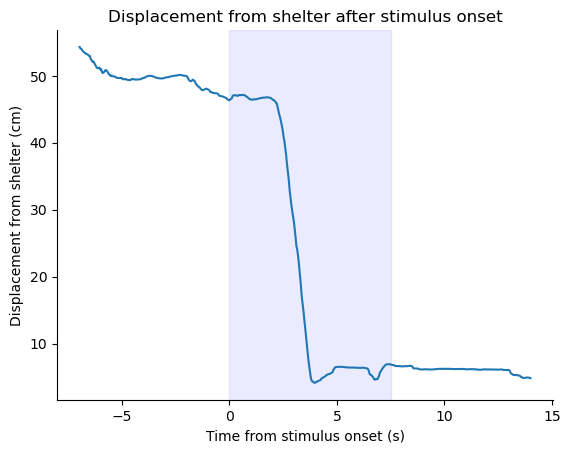

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

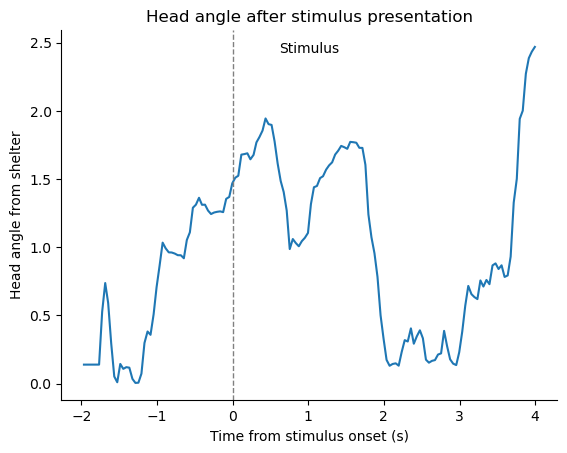

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

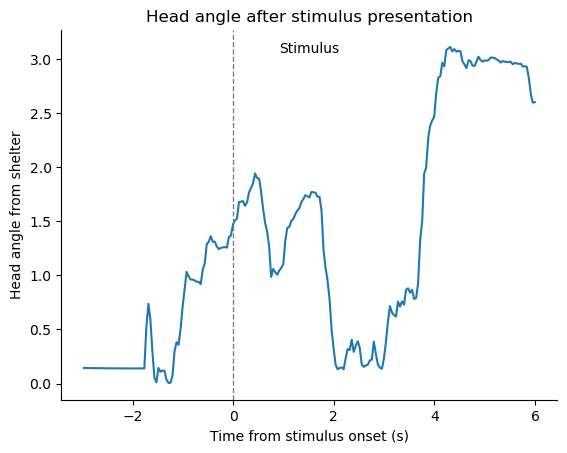

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

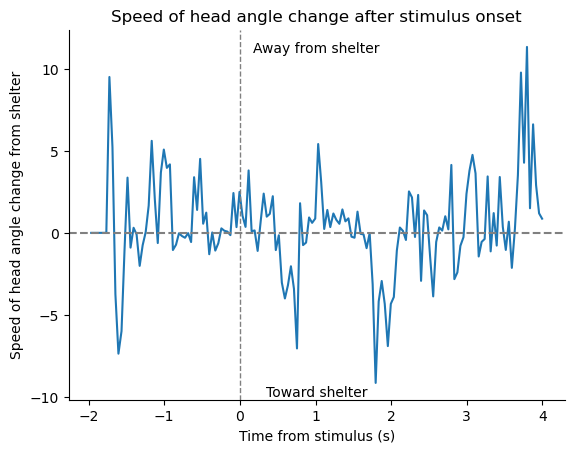

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
10815,10815,10815,-16.321658,-17.032251,0.999990,-18.085697,-16.311315,0.999986,-17.890065,-15.455348,...,0.999989,-22.579199,-15.159559,0.999995,0.034905,46.442137,3.458000,0.137566,1.509826,1.044158
10816,10816,10816,-16.343301,-17.253425,0.999987,-18.085697,-16.515324,0.999987,-17.890065,-15.666476,...,0.999987,-22.579199,-15.160306,0.999994,0.074905,46.553906,3.173207,0.126928,1.524476,0.366246
10817,10817,10817,-16.364129,-17.815889,0.999987,-18.114026,-16.733661,0.999993,-18.007599,-16.029666,...,0.999989,-22.579199,-15.168873,0.999994,0.115507,46.667651,2.805003,0.113889,1.679147,3.809453
10818,10818,10818,-16.888646,-18.179242,0.999961,-18.588642,-17.104925,0.999999,-18.170120,-16.497965,...,0.999989,-22.613537,-15.214365,0.999991,0.155289,47.038822,9.615643,0.382530,1.683113,0.099698
10819,10819,10819,-17.070933,-18.331489,0.999983,-18.815379,-17.206253,0.999999,-18.379404,-16.617272,...,0.999987,-22.812771,-15.214365,0.999987,0.194931,47.084710,2.433059,0.096451,1.689004,0.148583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10908,10908,10908,5.407194,23.480256,0.997578,4.575903,22.427610,0.999985,3.864197,22.838305,...,0.999969,1.483657,16.242796,0.999988,3.757107,5.529596,28.167969,1.148352,1.501805,4.278465
10909,10909,10909,6.291211,24.378199,0.992558,5.398784,23.450337,0.999957,4.712554,23.722552,...,0.999986,2.074887,17.277742,0.999746,3.795865,4.706665,33.897031,1.313781,1.941404,11.342129
10910,10910,10910,6.680635,24.898821,0.998370,5.937069,23.955021,0.999971,5.213267,24.411550,...,0.999988,2.354013,18.017493,0.999966,3.835789,4.412324,18.985276,0.757968,2.001346,1.501407
10911,10911,10911,7.503396,25.199403,0.996368,6.516428,24.309216,0.999965,5.911313,24.687284,...,0.999941,2.391606,18.992875,0.999951,3.876659,4.337615,13.930551,0.569342,2.271891,6.619660


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
10980,10980,10980,7.954709,23.180470,0.780365,7.185778,22.674300,0.999986,6.503332,23.319857,...,0.999960,2.516594,19.870580,0.999994,6.636493,5.139968,5.681589,0.227264,2.159312,-6.213959
10989,10989,10989,9.066339,28.329350,0.351425,8.555885,28.208533,0.999801,7.696588,28.339251,...,0.999918,5.417695,22.334099,0.999967,6.996608,5.647269,23.115893,0.917840,2.925479,8.076340
10990,10990,10990,9.225908,28.307824,0.126328,8.934123,28.607966,0.999565,8.022046,28.807883,...,0.999989,5.726695,22.805871,0.999985,7.036621,5.845297,9.553170,0.382251,1.869127,-26.400230
10991,10991,10991,9.385478,28.286297,0.005076,9.220340,29.038619,0.983415,8.338185,29.249064,...,0.999958,5.806271,23.603213,0.999959,7.076608,6.081234,12.329217,0.493008,1.284067,-14.631258
10992,10992,10992,9.545048,28.264771,0.000430,9.302189,29.040406,0.170286,8.652259,29.921483,...,0.999989,5.807919,24.108545,0.999985,7.117427,6.290632,15.853578,0.647127,1.375860,2.248799
10993,10993,10993,9.704617,28.243245,0.000410,9.384037,29.042194,0.059434,8.908653,30.151775,...,0.999993,5.955537,24.496476,0.999961,7.156928,6.449089,7.961648,0.314493,1.458362,2.088589
10994,10994,10994,9.864187,28.221719,0.000247,9.465886,29.043981,0.096084,8.960711,30.209624,...,0.999993,6.258349,24.674948,0.999765,7.197939,6.626398,4.958386,0.203348,1.532147,1.799147
10995,10995,10995,10.023756,28.200192,0.000380,9.547734,29.045769,0.036942,9.283885,30.374061,...,0.999992,6.448859,24.675531,0.999801,7.236787,6.746971,3.115277,0.121022,1.598007,1.695337
10996,10996,10996,10.183326,28.178666,0.000246,9.629583,29.047556,0.010981,9.541439,30.478805,...,0.999989,6.520009,24.781448,0.999790,7.276646,6.864360,3.309031,0.131895,1.656808,1.475236
10997,10997,10997,10.342896,28.157140,0.000358,9.711431,29.049343,0.016133,9.683696,30.478805,...,0.999982,6.520009,24.953676,0.999844,7.318425,6.893124,0.733497,0.030645,1.709401,1.258825


In [38]:
'''
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)
'''

'\nrotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)\nnormalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)\n'

In [39]:
'''

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
'''

"\n\nfig = plt.figure()  #create figure to fill in\nax = plt.axes()\n    \n    #make x and y scales equal - present as a circle\n\n\n    #plot the center x and y coordinates\nx = rotate['rotated_x']\ny = rotate['rotated_y']\n\nax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)\nshelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)\nax.add_patch(shelter)\n\nax.set_aspect('equal')\nax.plot(x,y, color = 'blue', linewidth = 1)\n"

In [40]:
'''
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    '''


"\nfig = plt.figure()  #create figure to fill in\nax = plt.axes()\n    \nx = normalized_df['x']\ny = normalized_df['y']\n\nax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)\nshelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)\nax.add_patch(shelter)\n\nax.set_aspect('equal')\nax.plot(x,y, color = 'blue', linewidth = 1)\n    "